In [13]:
import math, argparse
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline
from log_fit import main_log_fit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0, 0.5, 'unstandardized beta')

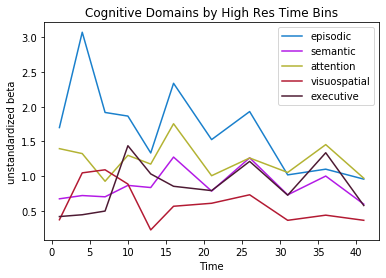

In [2]:
#time bins without last
x = np.array([1.000, 4.000, 7.000, 10.000, 13.000, 16.000, 21.000, 26.000, 31.000, 36.000, 41.000])
#episodic memory
y1 = np.array([1.700, 3.070, 1.917, 1.865, 1.335, 2.336, 1.527, 1.930, 1.020, 1.102, 0.959])
#semantic memory
y2 = np.array([ 0.676, 0.723, 0.705, 0.869, 0.838, 1.276, 0.787, 1.265, 0.733, 1.003, 0.599])
#attention
y3 = np.array([ 1.397, 1.326, 0.928, 1.301, 1.175, 1.755, 1.008, 1.263, 1.055, 1.455, 0.972])
#visuospatial
y4 = np.array([ 0.375, 1.049, 1.093, 0.888, 0.229, 0.569, 0.612, 0.734, 0.367, 0.441, 0.367])
#executive
y5 = np.array([ 0.421, 0.447, 0.500, 1.439, 1.034, 0.856, 0.794, 1.214, 0.728, 1.338, 0.580])


ys = [y1, y2, y3, y4, y5]

# show data
clrs = [(.1, .5, .8), (.7, .1, .9), (.7, .7, .2), (.7, .1, .2), (.3, .1, .2)]
#clrs = ['blue', 'purple', 'yellow', 'red', 'green']
names = ['episodic', 'semantic', 'attention', 'visuospatial', 'executive']

for iy, y in enumerate(ys):
       plt.plot(x, y, color=clrs[iy])
plt.title('Cognitive Domains by High Res Time Bins')
plt.legend(names)
plt.xlabel('Time')
plt.ylabel('unstandardized beta')

In [5]:
x = x.reshape(-1, 1)

In [11]:
reg = LinearRegression().fit(x, y1)
reg.score(x, y1)

0.472555827383233

In [8]:
results_y1 = main_log_fit(x, y1) # run without permutation test
results_y2 = main_log_fit(x, y2) # run without permutation test
results_y3 = main_log_fit(x, y3) # run without permutation test
results_y4 = main_log_fit(x, y4) # run without permutation test
results_y5 = main_log_fit(x, y5) # run without permutation test
#results_y1 = main_log_fit(x, y1, to_perm_test=True, Nsim=15) # run with permutation test
#results_y2 = main_log_fit(x, y2, to_perm_test=True, Nsim=15)

[-1.45290841 11.80716534 -0.25988372  1.96542917]
[ 9.19413291 -0.92940971 -0.2382029   0.93116451]
[-4.24288491  4.34309789  1.5873269  -0.34778145]
[ 28.74218913 -21.35860835   0.30195833   0.39166667]
[-10.55307592 -12.15740189  -0.10064853   0.85009091]


c:\Users\15634\Google Drive\Brain_lab\logistic-model-fitting-main\logistic-model-fitting-main\log_fit.py:29: RuntimeWarning: overflow encountered in exp
  return b + ( l/(1 + np.exp(-k * (x-c))) )
C:\Users\15634\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\15634\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [15]:
results = [results_y1, results_y2, results_y3, results_y4, results_y5]

In [8]:
results[0].y_predict

array([1.70554546, 1.70554546, 1.70554546, 1.70554546, 1.70554546,
       1.70554546, 1.70554546, 1.70554546, 1.70554546, 1.70554546,
       1.70554546])

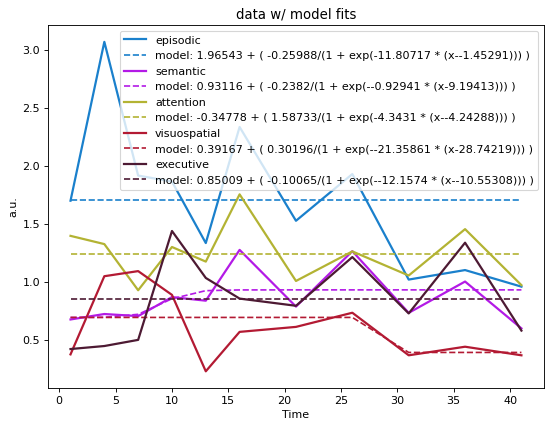

In [5]:
# show model fits
plt.figure(figsize=(8, 6), dpi=80)
legend = []
for iy, y in enumerate(ys):
    plt.plot(x, y, color=clrs[iy], linewidth=2)
    plt.plot(x, results[iy].y_predict, color=clrs[iy], linestyle='--')
    legend.append(names[iy])
    legend.append('model: {} + ( {}/(1 + exp(-{} * (x-{}))) )'.format(\
        round(results[iy].y_init,5), round(results[iy].y_final,5), \
        round(results[iy].k,5), round(results[iy].x,5)))

plt.xlabel('Time')
plt.ylabel('a.u.')
plt.title('data w/ model fits')
plt.legend(legend)

In [27]:
# display information about model fits
for ires, res in enumerate(results):
    print(names[ires] + ' Model parameters:----------------------')
    print('Inflection point (x): ' + str(res.x))
    print('Slope (k): ' + str(res.k))
    print('Y-change: ' + str(res.y_change))
    print('Y-initial value: ' + str(res.y_init))
    print('Y-final value: ' + str(res.y_final))
    print('')
    print(names[ires] + ' Model fit information:--------------------')
    print('Rank Correl. btwn predicted & true y-vaules (r): ' + str(res.stats_r))
    print('Rank Correl. btwn predicted & true y-vaules (Pvalue-Parametric): ' + str(res.stats_Ppara))
    #if 'stats_Pperm' in dir(res):
      #  print('Rank Correl. btwn predicted & true y-vaules (Pvalue-Permutation): ' + str(res.stats_Pperm))
    #print('')

episodic Model parameters:----------------------
Inflection point (x): -1.4529084067553724
Slope (k): 11.807165339756848
Y-change: -2.225312886561807
Y-initial value: 1.965429171347253
Y-final value: -0.25988371521455406

episodic Model fit information:--------------------
Rank Correl. btwn predicted & true y-vaules (r): 0.0
Rank Correl. btwn predicted & true y-vaules (Pvalue-Parametric): 1
semantic Model parameters:----------------------
Inflection point (x): 9.194132907945221
Slope (k): -0.9294097077868385
Y-change: -1.1693674108451189
Y-initial value: 0.9311645088432761
Y-final value: -0.23820290200184283

semantic Model fit information:--------------------
Rank Correl. btwn predicted & true y-vaules (r): 0.21818181818181823
Rank Correl. btwn predicted & true y-vaules (Pvalue-Parametric): 0.259624123777491
attention Model parameters:----------------------
Inflection point (x): -4.2428849084667535
Slope (k): 4.343097885420603
Y-change: 1.9351083452307996
Y-initial value: -0.347781445